# Introduction to Python

CMPE 232

- Data Structure : Method for storing (__effective__) information
- Algorithm : Method for solving problems (__in an effective way__) 

Analysis of algorithms

 - Algorithm A (works in O(N^2))
 - Algorithm B (works in O(N log(N)))
 
Both work on the same data with size N

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### List comprehension

In [2]:
[i for i in range(1,10, 2)]

[1, 3, 5, 7, 9]

In [3]:
TBs = [N *math.log(N) for N in range(100,100000, 100)]
TAs = [N **2 for N in range(100,100000, 100)]

TBs[:5]

[460.51701859880916,
 1059.6634733096073,
 1711.1347423968602,
 2396.5858188431926,
 3107.304049211096]

In [4]:
TAs[:5]

[10000, 40000, 90000, 160000, 250000]

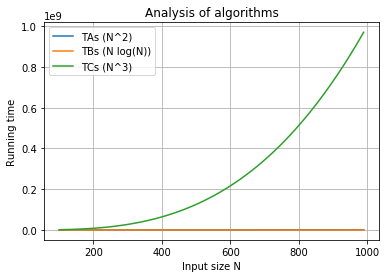

In [5]:
lastN = 1000

Ns = [N for N in range(100,lastN, 10)]
TBs = [N *math.log(N,2) for N in range(100,lastN, 10)]
TAs = [N **2 for N in range(100,lastN, 10)]
TCs = [N **3 for N in range(100,lastN, 10)]

plt.plot(Ns, TAs)
plt.plot(Ns, TBs)
plt.plot(Ns, TCs)
plt.title('Analysis of algorithms')
plt.ylabel('Running time')
plt.xlabel('Input size N')
plt.legend(['TAs (N^2)', 'TBs (N log(N))', 'TCs (N^3)'])
plt.grid()

## Outline
 - Intro 2 python programming
  - tuple, list, dictionary, zip, set, numpy
  - functions, class
  - read/write csv, excel files
  
 - Intro 2 graph processing algorithm in python
  - BFS (Breadth first search) algorithm
   - Knowledge in Queque is required
   
 - How to use Java Code

In [6]:
# Tuple: immutable collection of items
A = (2,3,6)

In [7]:
# List: mutable collection of items
B = list(A)

In [8]:
B

[2, 3, 6]

In [9]:
B[0] = 4

In [10]:
B

[4, 3, 6]

In [11]:
# Dictionary: collection of key-value pairs
#.            -- Hash-tables -- 
D = {'uzay': {'Star Wars': 5, 'V for Vandetta': 4, 'X Files': 0},
    'Ayse': {'Befores Sunset':5, 'V for Vandetta':4, 'Star Wars':1}}

In [12]:
D

{'uzay': {'Star Wars': 5, 'V for Vandetta': 4, 'X Files': 0},
 'Ayse': {'Befores Sunset': 5, 'V for Vandetta': 4, 'Star Wars': 1}}

In [13]:
D['uzay']

{'Star Wars': 5, 'V for Vandetta': 4, 'X Files': 0}

In [14]:
D['uzay']['Star Wars']

5

In [15]:
D['Ayse']['Star Wars']

1

In [16]:
# Set: collection of unique items
text = "merhaba merhaba nasilsin"
text

'merhaba merhaba nasilsin'

In [17]:
text.split()

['merhaba', 'merhaba', 'nasilsin']

In [18]:
s1 = set(text.split())
s2 = {'merhaba', 'iyiyim'}

In [19]:
s1

{'merhaba', 'nasilsin'}

In [20]:
s2

{'iyiyim', 'merhaba'}

In [21]:
def square(x):
    """maps input (x) to some output (x**2)"""
    return x**2

In [22]:
square(4)

16

In [23]:
s1.intersection(s2)

{'merhaba'}

In [24]:
s1.union(s2)

{'iyiyim', 'merhaba', 'nasilsin'}

In [25]:
len(s1.intersection(s2))/len(s1.union(s2))

0.3333333333333333

In [26]:
def jaccard(s1, s2):
    return len(s1.intersection(s2))/len(s1.union(s2))

In [27]:
s1

{'merhaba', 'nasilsin'}

In [28]:
s2

{'iyiyim', 'merhaba'}

In [29]:
jaccard(s1,s2)

0.3333333333333333

In [30]:
class textify():
    def __init__(self, text1, text2):
        print(text1)
        print(text2)

In [31]:
t = textify('mer', 'haba')

mer
haba


In [32]:
class textify():
    def __init__(self, text1, text2):
        self.s1 = set(text1.split())
        self.s2 = set(text2.split())
        
    def jaccard(self):
        return len(self.s1.intersection(self.s2))/len(self.s1.union(self.s2))


In [33]:
text1 = "merhaba merhaba nasilsin"
text2 = 'merhaba iyiyim'
t = textify(text1, text2)

In [34]:
t

In [35]:
t.jaccard()

0.3333333333333333

# Queue Implementation with lists

> FIFO: First in first out

In [36]:
q = []

In [37]:
q.append(5) # first in
q.append(7)
q.append(9) # last in

In [38]:
q

[5, 7, 9]

In [39]:
item = q.pop(0) # first in first out

In [40]:
item

5

In [41]:
q

[7, 9]

In [42]:
# stack
s = []

In [43]:
s.append(5) # first in
s.append(7)
s.append(9) # last in

In [44]:
s.pop()

9

In [45]:
s

[5, 7]

# BFS algorithm

In [46]:
class node():
    def __init__(self, name):
        self.name = name
        self.neighbors = []
        self.visited = False;

In [47]:
A = node('A')
B = node('B')
C = node('C')

In [48]:
A.name

'A'

In [49]:
A.visited

False

In [50]:
A.neighbors.append(B)
A.neighbors.append(C)

In [51]:
A

In [52]:
A.neighbors

[<__main__.node at 0x11483aba8>, <__main__.node at 0x11483ad30>]

In [53]:
[v.name for v in A.neighbors]

['B', 'C']

![BFS.png](BFS.png)

In [77]:
class node():
    def __init__(self, name):
        self.name = name
        self.neighbors = []
        self.visited = False;

class BreadthFirstSearch():
    def __init__(self):
        self.traversal = []
        
    def bfs(self, s):
        """BFS (from source vertex s)"""
        # initilization
        fifo = []
        fifo.append(s) # Put s onto a FIFO queue
        s.visited = True # and mark s as visited.
        
        self.traversal.append(s)
        
        # Repeat until the queue is empty:
        while len(fifo) != 0: 
            # remove the least recently added vertex v
            v = fifo.pop(0) # First in first out            
            print("%s " % v.name);
            # add each of v's unvisited neighbors to the queue
            for neighbor in v.neighbors: # v's neighbors
                if not neighbor.visited: # v's unvisited neighbors
                    neighbor.visited = True # and mark them as visited.
                    self.traversal.append(neighbor)
                    fifo.append(neighbor) # add to queue
                   
        

In [78]:
nodeA = node("A");
nodeB = node("B");
nodeC = node("C");
nodeD = node("D");
nodeE = node("E");

nodeA.neighbors.append(nodeB);
nodeA.neighbors.append(nodeC);
nodeB.neighbors.append(nodeD);
nodeD.neighbors.append(nodeE);

bfs = BreadthFirstSearch();
bfs.bfs(nodeA);

A 
B 
C 
D 
E 


In [79]:
bfs.traversal

In [80]:
[v.name for v in bfs.traversal]

['A', 'B', 'C', 'D', 'E']